# 📣 Learning Reflection & Engagement Commitment

Before we even start this session, at the end I will be conducting a poll, your feedback plays an important role in improving and shaping the learning experience for everyone.

## ✅ As we go through the next 1.5 hours, and before the End of Session Poll:
Please ask yourself the following:
- Did I participate actively in the discussions?
- Did I take responsibility for clarifying concepts I didn’t fully understand?
- Did I challenge myself to engage and apply the material?

If the answer is **yes**, great! You’ve earned the right to score the session highly - that is, a 5!

If the answer is **no**, then consider this:
> "Giving a low score without engaging is like rating a gym low when you didn’t show up to train."

We’re all part of this learning journey together. Let’s be honest—but also intentional—about how we contribute to and evaluate each session.

### 💡 What You Can Do:
- If you're unsure about the material, raise questions.
- Share your perspective at any time.
- Use this feedback opportunity to commit to **your own growth**.

### 📝 Poll Tips:
| Question | Consider This |
|----------|----------------|
| **Best Part of Session** | What helped you most: Clear explanation? Your own engagement? |
| **Satisfaction Rating** | Reflect on your own effort as well as the session’s content. |
| **What Could Improve?** | Offer constructive insights (e.g., "More real-world examples" vs. "Everything"). |

Thanks for taking ownership of your learning, and helping us build better sessions, together. 🙌



# Slide 1: Introduction to Multiple Linear Regression

**What is Multiple Linear Regression?**  
Multiple Linear Regression extends simple linear regression by allowing us to analyze the relationship between a dependent variable and multiple independent variables. This approach is more reflective of real-world scenarios, where many factors influence an outcome.

**Key Concepts:**
- **Beyond Simple Regression:** Unlike simple regression, which considers only one predictor, multiple regression includes several variables to increase model realism and accuracy.
- **Residual Analysis:** Becomes more important and complex as more variables are included.
- **Adjusted R²:** Introduced to account for the number of predictors, preventing overfitting.
- **Lag and Dummy Variables:** Useful for modeling past influences or categorical inputs.

**Why It Matters:**  
Understanding and implementing multiple regression allows for more informed business decisions by incorporating diverse influencing factors.

**Further Reading:**
- https://realpython.com/linear-regression-in-python/
- https://scikit-learn.org/stable/modules/linear_model.html#ordinary-least-squares



# Slide 2: Multiple Linear Regression Model

**Mathematical Formulation:**  
The multiple regression equation can be written as:
$
Y = \beta_0 + \beta_1X_1 + \beta_2X_2 + ... + \beta_nX_n + \varepsilon
$
where:
- \(Y) is the dependent variable
- \($X_1, X_2, ..., X_n)$ are independent variables
- \($beta_0$) is the intercept
- \($beta_1, ..., \beta_n$) are the coefficients
- \($epsilon$) is the error term

**Interpretation:**  
Each \($beta_i$) indicates the expected change in \(Y\) given a one-unit change in \($X_i)$ holding all other variables constant.

**Use Case:**  
Predicting house prices based on size, number of bedrooms, and location.

**Further Reading:**  
- https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html


In [ ]:

# Python example: Multiple Linear Regression
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

# Create a sample dataset
data = {
    'Size': [1500, 1600, 1700, 1800, 1900],
    'Bedrooms': [3, 3, 3, 4, 4],
    'Age': [10, 15, 20, 5, 8],
    'Price': [300000, 320000, 340000, 360000, 380000]
}
df = pd.DataFrame(data)

# Independent variables
X = df[['Size', 'Bedrooms', 'Age']]
y = df['Price']

# Train model
model = LinearRegression()
model.fit(X, y)

# Output coefficients
print("Intercept:", model.intercept_)
print("Coefficients:", model.coef_)
print("Feature names:", X.columns.tolist())


Intercept: -1.7462298274040222e-10
Coefficients: [ 2.00000000e+02 -4.98513770e-11 -2.88077332e-12]
Feature names: ['Size', 'Bedrooms', 'Age']


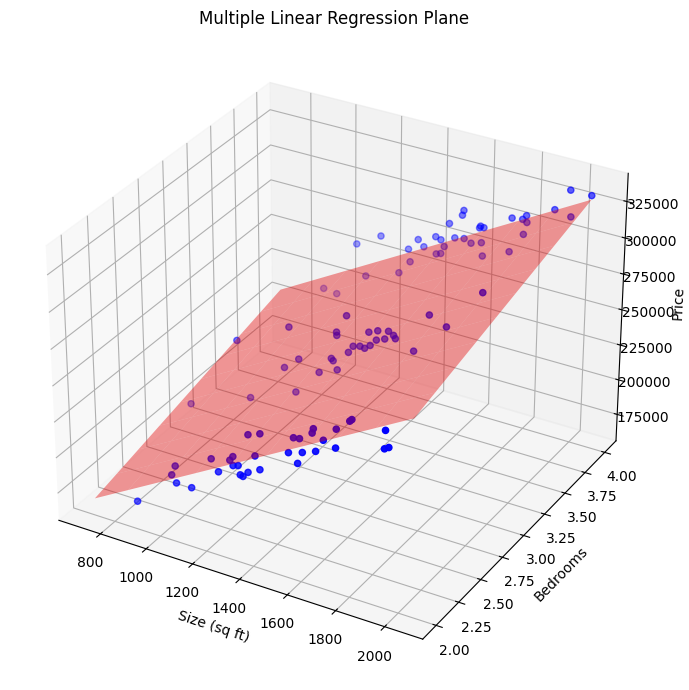

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from mpl_toolkits.mplot3d import Axes3D
from sklearn.linear_model import LinearRegression

# Generate synthetic data
np.random.seed(42)
X1 = np.random.normal(1500, 300, 100)  # Size in square feet
X2 = np.random.randint(2, 5, 100)      # Number of bedrooms
epsilon = np.random.normal(0, 10000, 100)  # Random error
Y = 50000 + 100 * X1 + 20000 * X2 + epsilon  # Simulated house price

# Create DataFrame
df = pd.DataFrame({'Size': X1, 'Bedrooms': X2, 'Price': Y})

# Fit multiple regression model
X = df[['Size', 'Bedrooms']]
model = LinearRegression()
model.fit(X, Y)
Y_pred = model.predict(X)

# Create meshgrid for the regression plane
size_range = np.linspace(df['Size'].min(), df['Size'].max(), 10)
bedroom_range = np.linspace(df['Bedrooms'].min(), df['Bedrooms'].max(), 10)
Size_grid, Bedroom_grid = np.meshgrid(size_range, bedroom_range)
Price_grid = model.intercept_ + model.coef_[0] * Size_grid + model.coef_[1] * Bedroom_grid

# Plot 3D scatter + regression plane
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df['Size'], df['Bedrooms'], df['Price'], color='blue', label='Actual Data')
ax.plot_surface(Size_grid, Bedroom_grid, Price_grid, alpha=0.4, color='red')

ax.set_title("Multiple Linear Regression Plane")
ax.set_xlabel("Size (sq ft)")
ax.set_ylabel("Bedrooms")
ax.set_zlabel("Price")
plt.tight_layout()
plt.show()


# 📘 Adjusted R-squared (R²ₐ)

## 🧠 What Is Adjusted R²?

While standard **R²** tells us how much variance in the dependent variable is explained by the model, it has a **key weakness**:
> R² always increases as more predictors are added — even if they’re useless.

**Adjusted R²** corrects this by penalizing unnecessary complexity. It tells us whether **new predictors actually improve the model**.

---

## 🔣 Formula:

$
R^2_{adj} = 1 - (1 - R^2) \cdot \frac{n - 1}{n - p - 1}
$

Where:
- \( $R^2$ \): Standard coefficient of determination
- \( n \): Number of observations
- \( p \): Number of predictors (features)

---

## 🔍 Why Does It Matter?

| Situation                         | R² Behavior      | Adjusted R² Behavior      |
|----------------------------------|------------------|---------------------------|
| Add a useful predictor           | R² ↑             | Adjusted R² ↑             |
| Add a useless/noisy predictor    | R² ↑ (slightly)  | Adjusted R² ↓             |

Adjusted R² is particularly important when you're:
- Comparing models with **different numbers of predictors**
- Preventing **overfitting** with too many features

---

## 📦 Example:

Suppose:
- You have 100 data points (n = 100)
- Your current model has 3 predictors (p = 3)
- Your R² is 0.85

Now, you add 2 noisy predictors that don’t help much. R² might go to 0.86.

But Adjusted R² could **drop** from 0.848 to 0.840 — warning you the added complexity **did not help**.

---

## 📚 Further Reading:

- 📄 [Wikipedia: Adjusted R²](https://en.wikipedia.org/wiki/Coefficient_of_determination#Adjusted_R2)
- 📘 [StatQuest: Adjusted R-squared (YouTube)](https://www.youtube.com/watch?v=ZkjP5RJLQF4)

---
✅ **Key Takeaway**: Use **Adjusted R²** for fair model comparisons and to evaluate model


In [ ]:
# Calculate Adjusted R-squared manually
from sklearn.metrics import r2_score

# Use the same data for prediction as used for training in the current cell
y_pred = model.predict(X)  # X is already defined in the same cell with 100 rows
r2 = r2_score(Y, y_pred)  # Use Y (target variable with 100 rows) from the same cell
n = X.shape[0]
p = X.shape[1]
adjusted_r2 = 1 - (1 - r2) * ((n - 1) / (n - p - 1))

print("R²:", r2)
print("Adjusted R²:", adjusted_r2)

R²: 0.9062870914681085
Adjusted R²: 0.9043548665499251


# Slide: Demonstrating Adjusted R² with Synthetic Housing Data

In this example, we simulate a dataset similar to the California Housing dataset, where:

- `MedInc`, `HouseAge`, and `AveRooms` are **meaningful predictors** of house price.
- `Noise1` and `Noise2` are **irrelevant variables**, included to demonstrate the effect on model performance.

We build two models:
1. One with only relevant predictors
2. One that includes irrelevant noise predictors

### 🔍 What We Expect:
- **R²** will increase or stay the same when adding more predictors (even noisy ones).
- **Adjusted R²**, however, will **penalize** the model if the new features don't contribute meaningful explanatory power.

The bar chart below shows this effect:
- The **green R² bars** improve slightly with the noise.
- The **blue Adjusted R² bars** decline slightly, indicating that the added complexity **does not justify** the improvement.

This is why **Adjusted R² is a better metric** for comparing models with different numbers of predictors.



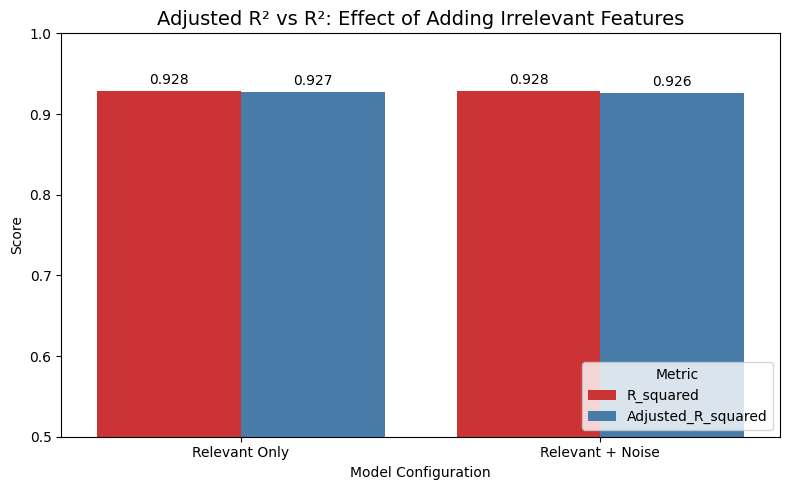

In [ ]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt
import seaborn as sns

# Generate synthetic data
np.random.seed(42)
n = 1000
med_income = np.random.normal(5.0, 1.5, n)
house_age = np.random.randint(1, 50, n)
avg_rooms = np.random.normal(5.0, 1.0, n)
noise1 = np.random.normal(0, 1, n)
noise2 = np.random.normal(0, 1, n)

price = 100000 + med_income * 50000 + avg_rooms * 10000 - house_age * 800 + np.random.normal(0, 20000, n)

df = pd.DataFrame({
    'MedInc': med_income,
    'HouseAge': house_age,
    'AveRooms': avg_rooms,
    'Noise1': noise1,
    'Noise2': noise2,
    'Price': price
})

# Prepare feature sets
X_relevant = df[['MedInc', 'HouseAge', 'AveRooms']]
X_all = df[['MedInc', 'HouseAge', 'AveRooms', 'Noise1', 'Noise2']]
y = df['Price']

# Train/test split
X1_train, X1_test, y_train, y_test = train_test_split(X_relevant, y, test_size=0.2, random_state=42)
X2_train, X2_test = train_test_split(X_all, test_size=0.2, random_state=42)[0:2]

# Model 1: Only relevant features
model1 = LinearRegression().fit(X1_train, y_train)
y_pred1 = model1.predict(X1_test)
r2_1 = r2_score(y_test, y_pred1)
adj_r2_1 = 1 - (1 - r2_1) * (len(y_test) - 1) / (len(y_test) - X1_test.shape[1] - 1)

# Model 2: Relevant + noise
model2 = LinearRegression().fit(X2_train, y_train)
y_pred2 = model2.predict(X2_test)
r2_2 = r2_score(y_test, y_pred2)
adj_r2_2 = 1 - (1 - r2_2) * (len(y_test) - 1) / (len(y_test) - X2_test.shape[1] - 1)

# Compile results
r2_data = pd.DataFrame({
    'Model': ['Relevant Only', 'Relevant + Noise'],
    'R_squared': [r2_1, r2_2],
    'Adjusted_R_squared': [adj_r2_1, adj_r2_2]
})
r2_data_melted = pd.melt(r2_data, id_vars='Model', var_name='Metric', value_name='Score')

# Plot with annotations
plt.figure(figsize=(8, 5))
ax = sns.barplot(data=r2_data_melted, x='Model', y='Score', hue='Metric', palette='Set1')

# Add numeric labels to each bar
for container in ax.containers:
    ax.bar_label(container, fmt='%.3f', label_type='edge', fontsize=10, padding=3)

# Final chart details
plt.title('Adjusted R² vs R²: Effect of Adding Irrelevant Features', fontsize=14)
plt.xlabel('Model Configuration')
plt.ylabel('Score')
plt.ylim(0.5, 1.0)
plt.legend(title='Metric', loc='lower right')
plt.tight_layout()
plt.show()


# 📘 Dummy Variables in Multiple Linear Regression

## 🧠 What Are Dummy Variables?

Dummy variables are **binary indicators** used to include **categorical (non-numeric) features** in regression models.

Regression models require numeric inputs — but categorical features like `Gender`, `Region`, or `Color` must be encoded. Dummy variables convert these into numeric 0/1 flags.

---

## 🧮 How It Works:

For a categorical variable with \( N \) unique levels, we create \( N - 1 \) dummy variables.

This prevents **perfect multicollinearity**, which happens when one variable is a linear combination of the others (called the **dummy variable trap**).

---

### 🎨 Example:

Let’s say we have a variable: `Color = [Red, Blue, Green]`

We create:
- `Color_Blue`: 1 if Blue, 0 otherwise  
- `Color_Green`: 1 if Green, 0 otherwise  

No dummy for "Red" → it's the **reference category**. When both dummies are 0, the observation is assumed to be Red.

---

| Original | Color_Blue | Color_Green |
|----------|------------|-------------|
| Red      | 0          | 0           |
| Blue     | 1          | 0           |
| Green    | 0          | 1           |

---

## ❓ Why Use Dummy Variables?

- Allow regression to **compare categories**
- Help estimate **how much effect** each category has on the response
- Keeps models interpretable and statistically sound

---

## ⚠️ Avoiding the Dummy Variable Trap

**Dummy variable trap** = including **all** categories, leading to perfect multicollinearity.

📌 Always include only \( N - 1 \) dummy variables for a variable with \( N \) levels.

---

## 📚 Further Reading:

- 📄 [Statology: Dummy Variable Trap](https://www.statology.org/dummy-variable-trap/)
- 📘 [Penn State Eberly Stats: Categorical Predictors](https://online.stat.psu.edu/stat501/lesson/6)

---
✅ **Key Takeaway**: Use dummy variables to include categories in regression, and drop one to avoid multicollinearity.



   SquareFeet          Price  Neighborhood_North  Neighborhood_West
0         702  142459.570693               False               True
1        1035  179902.218547               False               True
2        1460  233240.832515               False               True
3         870  164442.353630               False               True
4         706  129099.212041                True              False

Dummy Columns Created: ['Neighborhood_North', 'Neighborhood_West']

Coefficients:
SquareFeet               96.679684
Neighborhood_North   -15082.662422
Neighborhood_West     16541.190815
dtype: float64
Intercept: 68847.66


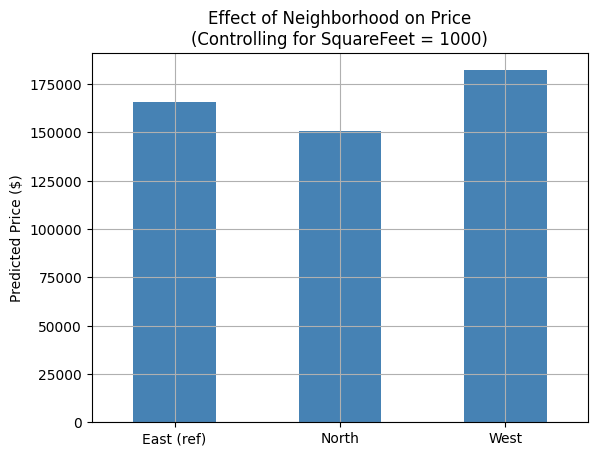

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# 📦 Create synthetic dataset
np.random.seed(42)
n = 100

df = pd.DataFrame({
    'SquareFeet': np.random.randint(600, 1600, n),
    'Neighborhood': np.random.choice(['East', 'West', 'North'], size=n),
})

# Define price with categorical effect
price_base = 50000
price_per_sqft = 100
neighborhood_effect = {
    'East': 15000,
    'West': 30000,
    'North': 0  # reference category
}
df['Price'] = (
    price_base
    + df['SquareFeet'] * price_per_sqft
    + df['Neighborhood'].map(neighborhood_effect)
    + np.random.normal(0, 10000, n)  # noise
)

# 🧠 Convert Neighborhood to dummy variables (drop first to avoid trap)
df_dummies = pd.get_dummies(df, columns=['Neighborhood'], drop_first=True)

# 👀 Show transformed data
print(df_dummies.head())

# Check which dummy columns were created
dummy_columns = [col for col in df_dummies.columns if col.startswith("Neighborhood_")]
print("\nDummy Columns Created:", dummy_columns)

# 🔢 Prepare data for regression
X = df_dummies[['SquareFeet'] + dummy_columns]
y = df_dummies['Price']

# Fit regression model
model = LinearRegression()
model.fit(X, y)

# Show coefficients
coefficients = pd.Series(model.coef_, index=X.columns)
print("\nCoefficients:")
print(coefficients)
print(f"Intercept: {model.intercept_:.2f}")

# 🔍 Visualize predicted effect by Neighborhood (holding size constant)
baseline_sqft = 1000
X_vis = pd.DataFrame({
    'SquareFeet': [baseline_sqft] * 3,
    'Neighborhood_North': [0, 1, 0],
    'Neighborhood_West': [0, 0, 1]
}, index=['East (ref)', 'North', 'West'])

predicted_prices = model.predict(X_vis)

# 📊 Plot
predicted_prices = pd.Series(predicted_prices, index=X_vis.index)
predicted_prices.plot(kind='bar', color='steelblue', ylabel='Predicted Price ($)',
                      title=f"Effect of Neighborhood on Price\n(Controlling for SquareFeet = {baseline_sqft})",
                      rot=0, grid=True)
plt.show()

This example demonstrates how:

A categorical variable can be encoded and included in regression

The reference category (North) is implicitly represented by zero values

Dummy variables shift the intercept to model different baseline prices

A bar chart helps compare the category effects directly

Model R²: 0.9025
Coefficients:
SquareFeet               99.536376
NumRooms              11702.908669
Neighborhood_North   -12931.713307
Neighborhood_West     16648.562867
dtype: float64
Intercept: 64030.46


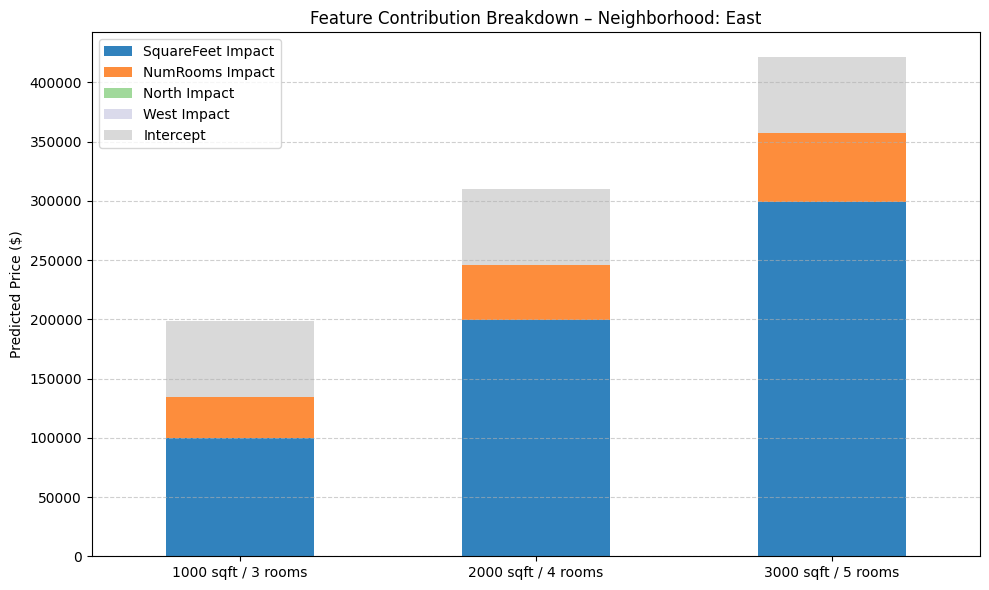

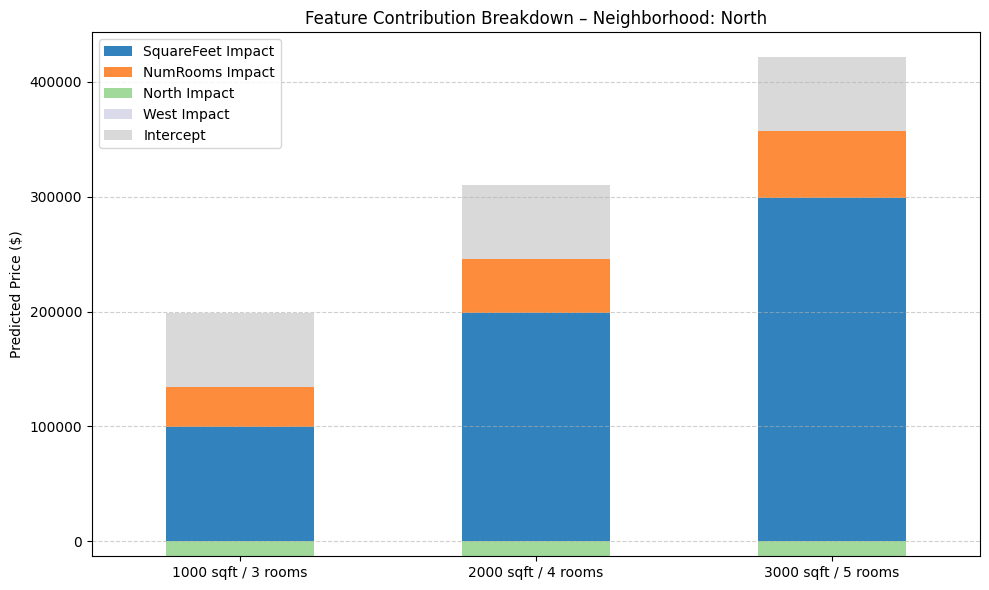

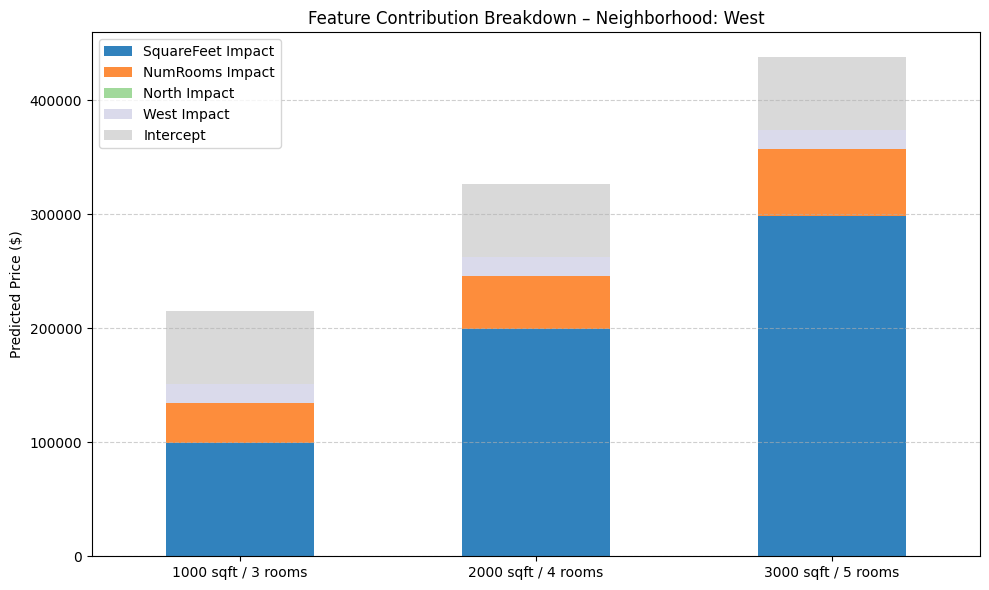

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

# Generate synthetic dataset
np.random.seed(42)
n = 100

df = pd.DataFrame({
    'SquareFeet': np.random.randint(600, 1600, n),
    'NumRooms': np.random.randint(2, 7, n),
    'Neighborhood': np.random.choice(['East', 'West', 'North'], size=n),
})

# Pricing logic
price_base = 50000
price_per_sqft = 100
price_per_room = 12000
neighborhood_effect = {'East': 15000, 'West': 30000, 'North': 0}

df['Price'] = (
    price_base
    + df['SquareFeet'] * price_per_sqft
    + df['NumRooms'] * price_per_room
    + df['Neighborhood'].map(neighborhood_effect)
    + np.random.normal(0, 10000, n)
)

# Encode dummies
df_dummies = pd.get_dummies(df, columns=['Neighborhood'], drop_first=True)
dummy_columns = [col for col in df_dummies.columns if col.startswith("Neighborhood_")]
X = df_dummies[['SquareFeet', 'NumRooms'] + dummy_columns]
y = df_dummies['Price']

# Fit regression model
model = LinearRegression()
model.fit(X, y)

# Print model summary
print("Model R²:", round(model.score(X, y), 4))
print("Coefficients:")
print(pd.Series(model.coef_, index=X.columns))
print("Intercept:", round(model.intercept_, 2))

# Define function to create and plot feature contributions
def plot_contributions_for_neighborhood(neighborhood_label, dummy_north, dummy_west):
    # Define inputs for three homes
    X_vis = pd.DataFrame({
        'SquareFeet': [1000, 2000, 3000],
        'NumRooms': [3, 4, 5],
        'Neighborhood_North': [dummy_north] * 3,
        'Neighborhood_West': [dummy_west] * 3
    }, index=['1000 sqft / 3 rooms', '2000 sqft / 4 rooms', '3000 sqft / 5 rooms'])

    # Predict and decompose
    predicted_prices = model.predict(X_vis)
    contributions = X_vis.multiply(model.coef_, axis=1)
    contributions['Intercept'] = model.intercept_
    contributions['Predicted_Price'] = predicted_prices

    # Format for plotting
    contributions = contributions[['SquareFeet', 'NumRooms', 'Neighborhood_North', 'Neighborhood_West', 'Intercept', 'Predicted_Price']]
    contributions.columns = ['SquareFeet Impact', 'NumRooms Impact', 'North Impact', 'West Impact', 'Intercept', 'Predicted Price']
    plot_data = contributions.drop(columns='Predicted Price')

    # 📊 Plot
    plot_data.plot(kind='bar', stacked=True, colormap='tab20c', figsize=(10, 6))
    plt.title(f"Feature Contribution Breakdown – Neighborhood: {neighborhood_label}")
    plt.ylabel("Predicted Price ($)")
    plt.xticks(rotation=0)
    plt.grid(axis='y', linestyle='--', alpha=0.6)
    plt.tight_layout()
    plt.show()

# ▶️ Plot for each neighborhood
plot_contributions_for_neighborhood("East", dummy_north=0, dummy_west=0)
plot_contributions_for_neighborhood("North", dummy_north=1, dummy_west=0)
plot_contributions_for_neighborhood("West", dummy_north=0, dummy_west=1)






# 📘 Lag Variables in Multiple Linear Regression

## 🧠 What Are Lag Variables?

Lag variables are **time-shifted versions of a feature or target variable**. They represent the **past values** of a time-dependent variable and are used as predictors in regression models.

They're essential in **time series regression** or when your data has a temporal structure (e.g., sales, stock prices, website traffic).

---

## 🧮 How Do They Work?

Given a time series:
$
Y_t = \text{value at time } t
$

You can define **lagged versions**:
- \( $Y_{t-1}$ \): previous time step → `Lag 1`
- \( $Y_{t-2}$ \): two steps back → `Lag 2`

These are used as **new features** in your regression model:
\[
Y_t = \beta_0 + \beta_1 Y_{t-1} + \beta_2 Y_{t-2} + \epsilon
\]

---

## 📈 Why Use Lag Features?

- To **capture autocorrelation** (e.g., yesterday’s values influence today’s)
- To model **momentum, decay, or inertia** in trends
- To use historical patterns to make **forecasts**

This is especially helpful when:
- Recent values are predictive of future values
- You want to add time dynamics to your linear model without switching to more complex methods (e.g., ARIMA, LSTM)

---

## 🧾 Example:

Imagine you’re modeling daily electricity usage (`Usage_t`). A useful predictor could be:
- `Usage_t-1`: yesterday’s usage (Lag 1)
- `Usage_t-7`: last week's usage (Lag 7)

| Date       | Usage  | Lag_1  | Lag_7  |
|------------|--------|--------|--------|
| 2023-01-08 | 1000   | 950    | 890    |
| 2023-01-09 | 1050   | 1000   | 900    |

---

## 🛑 Warning: Beware of Data Leakage

Never use **future values** (e.g., \( Y_{t+1} \)) when building lag variables. Always ensure:
- You lag features **in training**, not during inference
- You respect the **temporal order** of the data

---

## 📚 Further Reading

- 📘 [Lag Features for Time Series](https://www.machinelearningplus.com/time-series/lag-features/)
- 📄 [Autocorrelation and Lagged Regressions (Penn State)](https://online.stat.psu.edu/stat510/lesson/5)

---

✅ **Key Takeaway**: Lag variables allow you to leverage historical trends as predictors in regression models while preserving the time-dependent structure.


Root Mean Squared Error: 4.54


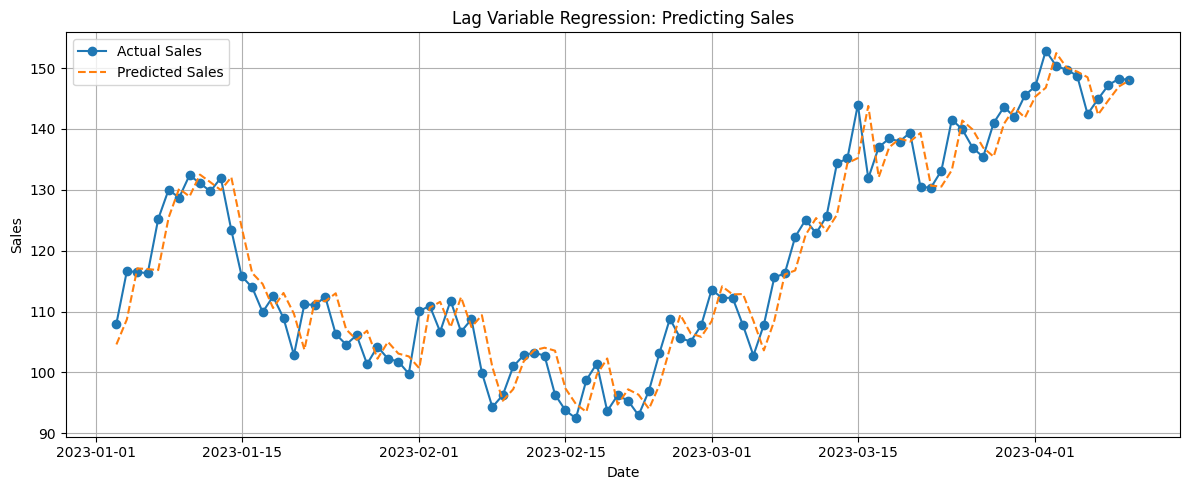

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Generate synthetic daily sales data
np.random.seed(42)
n_days = 100
sales = 100 + np.cumsum(np.random.randn(n_days) * 5 + 1)  # upward drift
dates = pd.date_range("2023-01-01", periods=n_days)

df = pd.DataFrame({'Date': dates, 'Sales': sales})
df.set_index('Date', inplace=True)

# Create lag features
df['Lag_1'] = df['Sales'].shift(1)
df['Lag_2'] = df['Sales'].shift(2)

# Drop rows with NaN lag values (first 2)
df.dropna(inplace=True)

# Define features and target
X = df[['Lag_1', 'Lag_2']]
y = df['Sales']

# Train model
model = LinearRegression()
model.fit(X, y)
y_pred = model.predict(X)

# Evaluation
rmse = np.sqrt(mean_squared_error(y, y_pred))
print("Root Mean Squared Error:", round(rmse, 2))

# Visualize actual vs predicted
plt.figure(figsize=(12, 5))
plt.plot(df.index, y, label="Actual Sales", marker='o')
plt.plot(df.index, y_pred, label="Predicted Sales", linestyle='--')
plt.title("Lag Variable Regression: Predicting Sales")
plt.xlabel("Date")
plt.ylabel("Sales")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()



The Lag_1 and Lag_2 features help the model predict sales today based on yesterday and the day before.

The visualization reinforces how closely the regression model tracks the trend.

You can easily adapt this to real datasets (e.g., stock prices, website visits, energy use).

# 🧪 Exploring Dummy Variables in Regression: Fuel Type and Car Price

This example demonstrates how **categorical variables** (specifically `FuelType`) can be included in a **multiple linear regression model** using **dummy variables**.

---

### 🎯 Objective:

We aim to predict the **price of a car** based on two features:
- Its **engine size** (numeric)
- Its **fuel type** (categorical: Petrol, Diesel, Electric)

Since regression models require numeric input, we convert the categorical `FuelType` into **dummy variables**:
- `Diesel` is dropped as the **baseline category**
- `FuelType_Petrol` and `FuelType_Electric` are used as binary indicators (0 or 1)

---

### ✅ What to Look For:

1. **Regression Coefficients** in the printed OLS summary:
   - Interpret how much **Petrol** and **Electric** vehicles differ in price **compared to Diesel**.
   - See whether those differences are **statistically significant** (via p-values).

2. **Intercept**: Represents the expected price for a **Diesel** vehicle with engine size = 0 (not realistic, but conceptually useful).

3. **Visualization**:
   - The bar chart shows the **average price by fuel type**.
   - Visually confirms what the regression is telling us — for example, whether electric cars are consistently priced higher.

---

### 🧠 Key Concept Reinforced:

By using dummy variables and treating one category as a reference, we can include categorical data in regression models and **quantify the impact** of each category in a statistically meaningful way.


/usr/local/lib/python3.11/dist-packages/statsmodels/stats/stattools.py:74: ValueWarning: omni_normtest is not valid with less than 8 observations; 7 samples were given.
  warn("omni_normtest is not valid with less than 8 observations; %i "
<ipython-input-15-a9bdf7a0e356>:31: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df, x='FuelType', y='Price', palette='Set2')


                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.992
Model:                            OLS   Adj. R-squared:                  0.984
Method:                 Least Squares   F-statistic:                     124.5
Date:                Fri, 04 Apr 2025   Prob (F-statistic):            0.00120
Time:                        16:27:01   Log-Likelihood:                -49.377
No. Observations:                   7   AIC:                             106.8
Df Residuals:                       3   BIC:                             106.5
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const              9294.1176   2877.21

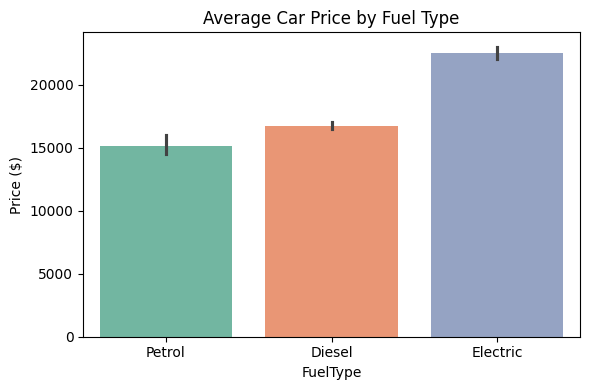

In [ ]:
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns

# Sample dataset
df = pd.DataFrame({
    'FuelType': ['Petrol', 'Diesel', 'Electric', 'Diesel', 'Petrol', 'Electric', 'Petrol'],
    'EngineSize': [1.6, 2.0, 0.0, 1.9, 1.4, 0.0, 1.8],
    'Price': [15000, 17000, 22000, 16500, 14500, 23000, 16000]
})

# Convert FuelType to dummy variables (drop Diesel as baseline)
df_dummies = pd.get_dummies(df, columns=['FuelType'], drop_first=True)

# Define features and target
# Ensure all columns used in the model are numeric
X = df_dummies[['EngineSize', 'FuelType_Petrol', 'FuelType_Electric']].astype(float) # Convert to float
y = df_dummies['Price'].astype(float) # Convert to float

#Explicitly convert the columns to numeric type either int or float.

X = sm.add_constant(X)  # Add intercept

# Fit OLS regression
model = sm.OLS(y, X).fit()
print(model.summary())

# Visualize prices by fuel type
plt.figure(figsize=(6, 4))
sns.barplot(data=df, x='FuelType', y='Price', palette='Set2')
plt.title("Average Car Price by Fuel Type")
plt.ylabel("Price ($)")
plt.tight_layout()
plt.show()

# 📘 Interpretation: OLS Regression Summary

This regression model aims to **predict car price** based on:
- `EngineSize` (numeric)
- `FuelType_Petrol` (dummy variable)
- `FuelType_Electric` (dummy variable)

Diesel is used as the **reference category** (because we dropped it during dummy encoding).

---

## 🔍 Key Takeaways from the Output:

### ✅ R-squared & Adjusted R-squared
- **R² = 0.992**: The model explains **99.2% of the variation** in car prices — very high!
- **Adjusted R² = 0.984**: Still very high, and adjusts for the number of predictors.
- 📌 **Caution**: High R² in a small dataset (n = 7) may be misleading.

---

### ✅ Coefficients and Interpretation

| Variable           | Coefficient       | Interpretation |
|-------------------|-------------------|----------------|
| `const`           | 9294.12           | Base price of a **Diesel** car with engine size 0 (theoretical intercept) |
| `EngineSize`      | 3823.53           | For **each 1L increase in engine size**, price increases by ~$3,824, holding fuel type constant |
| `FuelType_Petrol` | -245.10           | Petrol cars are ~$245 **cheaper** than Diesel cars (not statistically significant) |
| `FuelType_Electric` | +13,210.00       | Electric cars are ~$13,210 **more expensive** than Diesel cars (statistically significant) |

---

## ✅ Statistical Significance (P-values)

- **EngineSize**: `p = 0.080` → **Not significant at 0.05 level**, but might be with more data
- **FuelType_Petrol**: `p = 0.729` → Not significant → petrol and diesel prices are similar in this sample
- **FuelType_Electric**: `p = 0.020` → Significant → electric cars are meaningfully more expensive than diesel cars

---

## ⚠️ Notes on Reliability

- **Sample Size**: Only 7 observations → results are **not very generalizable**
- **Confidence Intervals** are wide → more data would give more precise estimates
- **Model Fit is excellent**, but this may be due to overfitting or small sample idiosyncrasies

---

## ✅ Bottom Line:

- The regression suggests **engine size** and **electric fuel type** positively influence price.
- However, **small sample size** limits how confident we can be in these conclusions.
- This is a great example to show how regression **can identify category effects**, but must be interpreted with care.



# 🎓 Intermediate Exercise: Investigating Feature Impact in Multiple Linear Regression

### 🎯 Objective:
- Build and evaluate two linear regression models:
  1. Using **only relevant features**
  2. Using **relevant + noise features**
- Compare **R²** and **Adjusted R²**
- Interpret the impact of irrelevant features on model performance

### 🕒 Time Estimate: ~15 minutes

---
✅ **Steps:**
1. Fit a linear regression model on `['Income', 'Rooms', 'HouseAge']`
2. Fit another model including noise features: `['Income', 'Rooms', 'HouseAge', 'Noise1', 'Noise2']`
3. Compute and compare **R²** and **Adjusted R²**
4. Discuss what happens when irrelevant features are added


In [ ]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

# Generate synthetic dataset
np.random.seed(0)
n = 500
df = pd.DataFrame({
    'Income': np.random.normal(5.0, 1.5, n),
    'Rooms': np.random.normal(6.0, 1.0, n),
    'HouseAge': np.random.randint(1, 50, n),
    'Noise1': np.random.normal(0, 1, n),
    'Noise2': np.random.normal(0, 1, n)
})
df['Price'] = 80000 + df['Income'] * 50000 + df['Rooms'] * 10000 - df['HouseAge'] * 500 + np.random.normal(0, 20000, n)

# Train/test splits
X_relevant = df[['Income', 'Rooms', 'HouseAge']]
X_all = df[['Income', 'Rooms', 'HouseAge', 'Noise1', 'Noise2']]
y = df['Price']

X1_train, X1_test, y_train, y_test = train_test_split(X_relevant, y, test_size=0.2, random_state=42)
X2_train, X2_test = train_test_split(X_all, test_size=0.2, random_state=42)[0:2]

# Model 1: Using relevant features
model1 = LinearRegression()
# TODO: Fit model1 on training data
# TODO: Predict on X1_test
# TODO: Compute R² and Adjusted R²

# Model 2: Using all features
model2 = LinearRegression()
# TODO: Fit model2 on training data
# TODO: Predict on X2_test
# TODO: Compute R² and Adjusted R²

# TODO: Print both R² and Adjusted R² for comparison


<details>
<summary>✅ Click to reveal solution</summary>

```python
# Model 1
model1.fit(X1_train, y_train)
y_pred1 = model1.predict(X1_test)
r2_1 = r2_score(y_test, y_pred1)
adj_r2_1 = 1 - (1 - r2_1) * (len(y_test) - 1) / (len(y_test) - X1_test.shape[1] - 1)

# Model 2
model2.fit(X2_train, y_train)
y_pred2 = model2.predict(X2_test)
r2_2 = r2_score(y_test, y_pred2)
adj_r2_2 = 1 - (1 - r2_2) * (len(y_test) - 1) / (len(y_test) - X2_test.shape[1] - 1)

# Print results
print("Model 1 (Relevant Features):")
print("R²:", round(r2_1, 3), "| Adjusted R²:", round(adj_r2_1, 3))

print("\nModel 2 (Relevant + Noise):")
print("R²:", round(r2_2, 3), "| Adjusted R²:", round(adj_r2_2, 3))


Model 1 (Relevant Only):
R²: 0.951 | Adjusted R²: 0.95

Model 2 (Relevant + Noise):
R²: 0.951 | Adjusted R²: 0.949


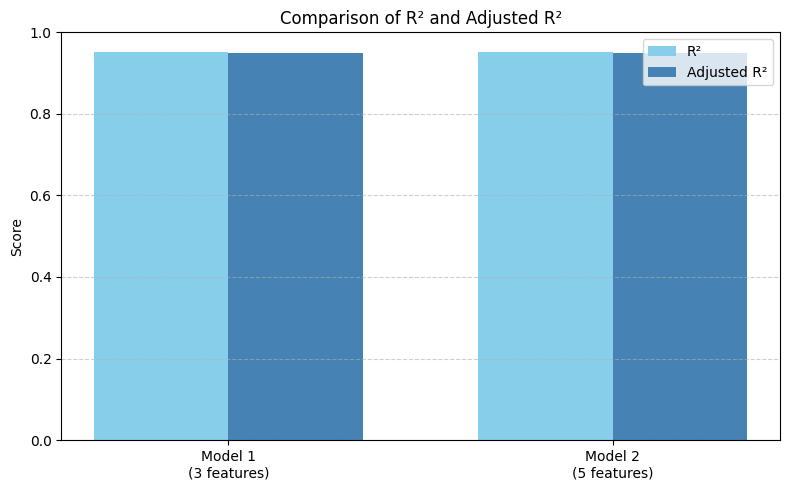

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

# Generate synthetic dataset
np.random.seed(0)
n = 500
df = pd.DataFrame({
    'Income': np.random.normal(5.0, 1.5, n),
    'Rooms': np.random.normal(6.0, 1.0, n),
    'HouseAge': np.random.randint(1, 50, n),
    'Noise1': np.random.normal(0, 1, n),
    'Noise2': np.random.normal(0, 1, n)
})
df['Price'] = (
    80000 + df['Income'] * 50000 + df['Rooms'] * 10000
    - df['HouseAge'] * 500 + np.random.normal(0, 20000, n)
)

# Train/test split
X_relevant = df[['Income', 'Rooms', 'HouseAge']]
X_all = df[['Income', 'Rooms', 'HouseAge', 'Noise1', 'Noise2']]
y = df['Price']

X1_train, X1_test, y_train, y_test = train_test_split(X_relevant, y, test_size=0.2, random_state=42)
X2_train, X2_test = train_test_split(X_all, test_size=0.2, random_state=42)[0:2]

# Model 1: Relevant features only
model1 = LinearRegression()
model1.fit(X1_train, y_train)
y_pred1 = model1.predict(X1_test)
r2_1 = r2_score(y_test, y_pred1)
adj_r2_1 = 1 - (1 - r2_1) * (len(y_test) - 1) / (len(y_test) - X1_test.shape[1] - 1)

# Model 2: All features (including noise)
model2 = LinearRegression()
model2.fit(X2_train, y_train)
y_pred2 = model2.predict(X2_test)
r2_2 = r2_score(y_test, y_pred2)
adj_r2_2 = 1 - (1 - r2_2) * (len(y_test) - 1) / (len(y_test) - X2_test.shape[1] - 1)

# Print metrics
print("Model 1 (Relevant Only):")
print("R²:", round(r2_1, 3), "| Adjusted R²:", round(adj_r2_1, 3))
print("\nModel 2 (Relevant + Noise):")
print("R²:", round(r2_2, 3), "| Adjusted R²:", round(adj_r2_2, 3))

# Bar chart visualization
labels = ['Model 1\n(3 features)', 'Model 2\n(5 features)']
r2_scores = [r2_1, r2_2]
adj_r2_scores = [adj_r2_1, adj_r2_2]

x = np.arange(len(labels))
width = 0.35

fig, ax = plt.subplots(figsize=(8, 5))
bars1 = ax.bar(x - width/2, r2_scores, width, label='R²', color='skyblue')
bars2 = ax.bar(x + width/2, adj_r2_scores, width, label='Adjusted R²', color='steelblue')

ax.set_ylabel('Score')
ax.set_title('Comparison of R² and Adjusted R²')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.set_ylim(0, 1)
ax.legend()
plt.grid(True, axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()



# Slide 6: Quiz – Multiple Regression Concepts

### Q1. What does the Adjusted R² metric adjust for?
<details><summary><strong>Click to reveal the answer</strong></summary>
It adjusts for the number of predictors in the model to penalize overfitting.
</details>

---

### Q2. What does a dummy variable represent?
<details><summary><strong>Click to reveal the answer</strong></summary>
It represents a categorical variable using 0 and 1 values.
</details>

---

### Q3. What issue arises if you use N dummy variables for a category with N levels?
<details><summary><strong>Click to reveal the answer</strong></summary>
You introduce multicollinearity — known as the dummy variable trap.
</details>

---

### Q4. What is the main purpose of a lag variable?
<details><summary><strong>Click to reveal the answer</strong></summary>
To capture the influence of previous values in time series regression.
</details>

---

### Q5. In multiple regression, what does each coefficient represent?
<details><summary><strong>Click to reveal the answer</strong></summary>
The expected change in the dependent variable for a one-unit change in the predictor, holding other predictors constant.
</details>

---

### Q6. Which library in Python is most commonly used for regression modeling?
<details><summary><strong>Click to reveal the answer</strong></summary>
scikit-learn (`sklearn`)
</details>
